In [77]:
%matplotlib inline
import seaborn as sns
import pandas as pd
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn import metrics
from sklearn.model_selection  import train_test_split
import numpy as np
from scipy.stats import norm # for scientific Computing
from scipy import stats, integrate
import matplotlib.pyplot as plt

#from sklearn.datasets import fetch_mldata
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn import tree

from dmba import plotDecisionTree, classificationSummary, regressionSummary
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


In [78]:
df= pd.read_csv('KSI.csv')

In [79]:
df.head()

,X,Y,INDEX_,ACCNUM,YEAR,DATE,TIME,HOUR,STREET1,STREET2,...,PASSENGER,SPEEDING,AG_DRIV,REDLIGHT,ALCOHOL,DISABILITY,POLICE_DIVISION,HOOD_ID,NEIGHBOURHOOD,ObjectId
0,-8.844611e+06,5.412414e+06,3387730,892658,2006,2006/03/11 05:00:00+00,852,8,BLOOR ST W,DUNDAS ST W,...,<Null>,<Null>,Yes,<Null>,<Null>,<Null>,D11,88,High Park North (88),1
1,-8.844611e+06,5.412414e+06,3387731,892658,2006,2006/03/11 05:00:00+00,852,8,BLOOR ST W,DUNDAS ST W,...,<Null>,<Null>,Yes,<Null>,<Null>,<Null>,D11,88,High Park North (88),2
2,-8.816480e+06,5.434843e+06,3388101,892810,2006,2006/03/11 05:00:00+00,915,9,MORNINGSIDE AVE,SHEPPARD AVE E,...,<Null>,<Null>,Yes,Yes,<Null>,<Null>,D42,131,Rouge (131),3
3,-8.816480e+06,5.434843e+06,3388102,892810,2006,2006/03/11 05:00:00+00,915,9,MORNINGSIDE AVE,SHEPPARD AVE E,...,<Null>,<Null>,Yes,Yes,<Null>,<Null>,D42,131,Rouge (131),4
4,-8.822759e+06,5.424516e+06,3387793,892682,2006,2006/03/12 05:00:00+00,240,2,EGLINTON AVE E,COMMONWEALTH AVE,...,<Null>,<Null>,<Null>,<Null>,Yes,<Null>,D41,138,Eglinton East (138),5


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 57 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   X                16860 non-null  float64
 1   Y                16860 non-null  float64
 2   INDEX_           16860 non-null  int64  
 3   ACCNUM           16860 non-null  int64  
 4   YEAR             16860 non-null  int64  
 5   DATE             16860 non-null  object 
 6   TIME             16860 non-null  int64  
 7   HOUR             16860 non-null  int64  
 8   STREET1          16860 non-null  object 
 9   STREET2          16860 non-null  object 
 10  OFFSET           16860 non-null  object 
 11  ROAD_CLASS       16860 non-null  object 
 12  DISTRICT         16860 non-null  object 
 13  WARDNUM          16860 non-null  object 
 14  DIVISION         16860 non-null  object 
 15  LATITUDE         16860 non-null  float64
 16  LONGITUDE        16860 non-null  float64
 17  LOCCOORD    

In [81]:
df.columns

Index(['X', 'Y', 'INDEX_', 'ACCNUM', 'YEAR', 'DATE', 'TIME', 'HOUR', 'STREET1',
       'STREET2', 'OFFSET', 'ROAD_CLASS', 'DISTRICT', 'WARDNUM', 'DIVISION',
       'LATITUDE', 'LONGITUDE', 'LOCCOORD', 'ACCLOC', 'TRAFFCTL', 'VISIBILITY',
       'LIGHT', 'RDSFCOND', 'ACCLASS', 'IMPACTYPE', 'INVTYPE', 'INVAGE',
       'INJURY', 'FATAL_NO', 'INITDIR', 'VEHTYPE', 'MANOEUVER', 'DRIVACT',
       'DRIVCOND', 'PEDTYPE', 'PEDACT', 'PEDCOND', 'CYCLISTYPE', 'CYCACT',
       'CYCCOND', 'PEDESTRIAN', 'CYCLIST', 'AUTOMOBILE', 'MOTORCYCLE', 'TRUCK',
       'TRSN_CITY_VEH', 'EMERG_VEH', 'PASSENGER', 'SPEEDING', 'AG_DRIV',
       'REDLIGHT', 'ALCOHOL', 'DISABILITY', 'POLICE_DIVISION', 'HOOD_ID',
       'NEIGHBOURHOOD', 'ObjectId'],
      dtype='object')

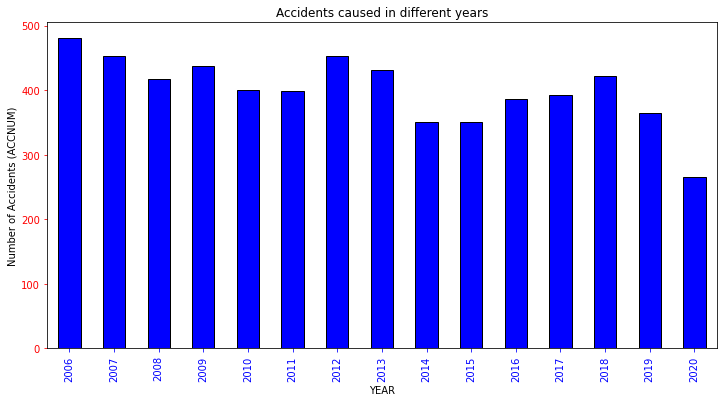

In [82]:
Num_accident = df.groupby('YEAR')['ACCNUM'].nunique()
plt.figure(figsize=(12,6))
plt.title("Accidents caused in different years")
plt.ylabel('Number of Accidents (ACCNUM)')

ax = plt.gca()
ax.tick_params(axis='x', colors='blue')
ax.tick_params(axis='y', colors='red')
my_colors = list('rgbkymc')   #red, green, blue, black, etc.
Num_accident.plot(
    kind='bar', 
    color='blue',
    edgecolor='black'
)
#Num_accident.plot(kind='bar',color= my_colors)
plt.show()

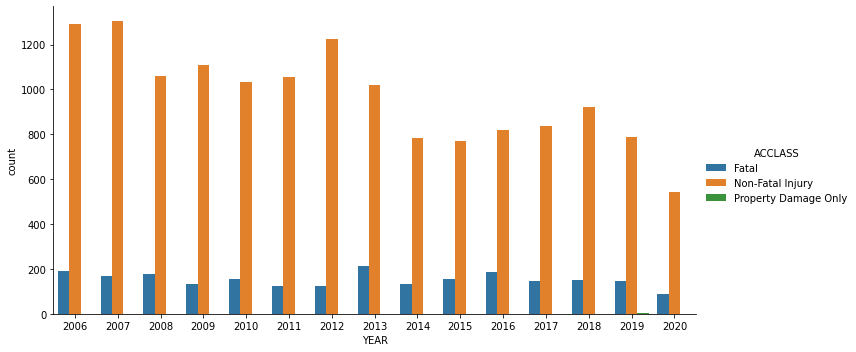

In [83]:
sns.catplot(x='YEAR', kind='count', data=df,  hue='ACCLASS', height=5, aspect=2)


In [84]:
df1 = df.dropna(thresh=2)
print(df1)

                  X             Y    INDEX_   ACCNUM  YEAR  \
0     -8.844611e+06  5.412414e+06   3387730   892658  2006   
1     -8.844611e+06  5.412414e+06   3387731   892658  2006   
2     -8.816480e+06  5.434843e+06   3388101   892810  2006   
3     -8.816480e+06  5.434843e+06   3388102   892810  2006   
4     -8.822759e+06  5.424516e+06   3387793   892682  2006   
...             ...           ...       ...      ...   ...   
16855 -8.820837e+06  5.421411e+06  81509784  1636966  2020   
16856 -8.820068e+06  5.425334e+06  81505452  1650701  2020   
16857 -8.820068e+06  5.425334e+06  81505453  1650701  2020   
16858 -8.820068e+06  5.425334e+06  81505454  1650701  2020   
16859 -8.842562e+06  5.412998e+06  81509748  1650875  2020   

                         DATE  TIME  HOUR          STREET1           STREET2  \
0      2006/03/11 05:00:00+00   852     8       BLOOR ST W       DUNDAS ST W   
1      2006/03/11 05:00:00+00   852     8       BLOOR ST W       DUNDAS ST W   
2      2006/03/

In [85]:
KSI_d = df1.loc[:,['ACCLASS','PEDTYPE','IMPACTYPE','INVTYPE','TRAFFCTL','PEDESTRIAN','PEDACT','PEDCOND']]
KSI_d

,ACCLASS,PEDTYPE,IMPACTYPE,INVTYPE,TRAFFCTL,PEDESTRIAN,PEDACT,PEDCOND
0,Fatal,<Null>,Pedestrian Collisions,Driver,Traffic Signal,Yes,<Null>,<Null>
1,Fatal,Vehicle turns left while ped crosses with ROW ...,Pedestrian Collisions,Pedestrian,Traffic Signal,Yes,Crossing with right of way,Unknown
2,Fatal,<Null>,Turning Movement,Motorcycle Driver,Traffic Signal,<Null>,<Null>,<Null>
3,Fatal,<Null>,Turning Movement,Driver,Traffic Signal,<Null>,<Null>,<Null>
4,Fatal,<Null>,Pedestrian Collisions,Driver,No Control,Yes,<Null>,<Null>
...,...,...,...,...,...,...,...,...
16855,Non-Fatal Injury,<Null>,Cyclist Collisions,Cyclist,No Control,<Null>,<Null>,<Null>
16856,Non-Fatal Injury,<Null>,Turning Movement,Driver,Traffic Signal,<Null>,<Null>,<Null>
16857,Non-Fatal Injury,<Null>,Turning Movement,Driver,Traffic Signal,<Null>,<Null>,<Null>
16858,Non-Fatal Injury,<Null>,Turning Movement,Passenger,Traffic Signal,<Null>,<Null>,<Null>


In [86]:
objdtype_cols = KSI_d.select_dtypes(["object"]).columns
KSI_d[objdtype_cols] = KSI_d[objdtype_cols].astype('category')

In [87]:
feature_lst=['ACCLASS','PEDTYPE','IMPACTYPE','INVTYPE','TRAFFCTL','PEDESTRIAN','PEDACT','PEDCOND']

In [88]:
df_sel=df[feature_lst].copy()
df_sel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ACCLASS     16860 non-null  object
 1   PEDTYPE     16860 non-null  object
 2   IMPACTYPE   16860 non-null  object
 3   INVTYPE     16860 non-null  object
 4   TRAFFCTL    16860 non-null  object
 5   PEDESTRIAN  16860 non-null  object
 6   PEDACT      16860 non-null  object
 7   PEDCOND     16860 non-null  object
dtypes: object(8)
memory usage: 1.0+ MB


Logistic Regression

In [91]:
target='ACCLASS'
# Create arrays for the features and the response variable
print(df_sel.shape)
# set X and y
y = df_sel[target]
X1 = df_sel.drop(target, axis=1)
X = pd.get_dummies(X1, drop_first=True)
print(X.shape)

(16860, 8)
(16860, 80)


In [92]:
train_X, valid_X, train_y, valid_y = train_test_split(X,y, test_size=0.4, random_state=1)

In [93]:
logit_reg = LogisticRegression()
logit_reg.fit(train_X, train_y)

C:\Users\Tu Nguyen\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [94]:
logit_reg.intercept_

array([ 1.48786561,  3.66947926, -5.15734487])

In [95]:
logit_reg.coef_

array([[ 2.45464991e-01, -4.62059932e-01,  4.31498833e-01,
         1.14096572e+00, -1.00115306e-01,  1.93101916e-01,
         3.83173274e-01, -1.35719124e-01,  5.70346101e-01,
         1.90653471e-02,  2.30141311e-01,  3.31334103e-01,
        -2.49619335e-01,  2.72126075e-01,  1.92233378e-01,
        -8.84750667e-02, -2.12114930e-01, -3.38610774e-02,
        -3.99818222e-01, -4.91204474e-01,  7.09320289e-01,
        -1.28906129e+00,  3.29071833e-03, -1.04307655e-01,
        -4.91625090e-01, -2.18975310e-01, -4.10841905e-01,
         0.00000000e+00, -3.23092558e-01,  2.07620370e-01,
        -7.21376862e-01, -6.21485116e-01,  2.83317565e-02,
        -6.17070111e-01,  3.63448096e-01, -1.34634866e-01,
         5.44945454e-02, -4.43071783e-01, -1.69007863e-01,
         0.00000000e+00,  4.50198131e-01,  7.58340523e-02,
        -4.83598886e-01,  6.12905708e-01,  2.81840189e-01,
         5.68034793e-01,  0.00000000e+00, -1.09911331e-01,
         4.50438552e-01, -3.38198704e-01, -7.19415663e-0

In [96]:
logit_reg = LogisticRegression(solver='liblinear', C=1e42, random_state=1)
logit_reg.fit(train_X, train_y)


LogisticRegression(C=1e+42, random_state=1, solver='liblinear')

In [97]:
print(pd.DataFrame({'coef': logit_reg.coef_[0], 'odds':np.e**logit_reg.coef_[0]},index=X.columns))

                                                         coef           odds
PEDTYPE_Other / Undefined                            0.733593       2.082550
PEDTYPE_Pedestrian hit a PXO/ped. Mid-block signal  -9.429246       0.000080
PEDTYPE_Pedestrian hit at mid-block                  0.951707       2.590128
PEDTYPE_Pedestrian hit at parking lot               12.125064  184437.109567
PEDTYPE_Pedestrian hit at private driveway          -0.149227       0.861374
...                                                       ...            ...
PEDCOND_Inattentive                                 -0.934112       0.392935
PEDCOND_Medical or Physical Disability              -0.105133       0.900205
PEDCOND_Normal                                      -0.988961       0.371963
PEDCOND_Other                                       -0.391979       0.675718
PEDCOND_Unknown                                      0.655516       1.926136

[80 rows x 2 columns]


In [98]:
logit_reg_prob = logit_reg.predict_proba(valid_X)

In [99]:
logit_reg_prob

array([[1.09672648e-01, 8.90327352e-01, 2.37324044e-19],
       [2.07429699e-01, 7.92570301e-01, 4.74016091e-15],
       [7.43049384e-02, 9.25695045e-01, 1.61030682e-08],
       ...,
       [1.66827547e-01, 8.33172453e-01, 8.98784931e-20],
       [1.58027377e-01, 8.41972623e-01, 3.10034462e-15],
       [1.58027377e-01, 8.41972623e-01, 3.10034462e-15]])

In [100]:
logit_reg_pred = logit_reg.predict(valid_X)

In [125]:
classes = ['non-fatal injury','fatal']
classificationSummary(logit_result.actual, logit_result.predicted, class_names=classes)

Confusion Matrix (Accuracy 0.8663)

                 Prediction
          Actual non-fatal injury            fatal
non-fatal injury               43              863
           fatal               39             5799


In [124]:
logit_result = pd.DataFrame({'actual' : valid_y,
                             'p_0' : [p[0] for p in logit_reg_prob],
                             'p_1' : [p[1] for p in logit_reg_prob],
                             'predicted': logit_reg_pred})
logit_result

,actual,p_0,p_1,predicted
15374,Fatal,0.109673,0.890327,Non-Fatal Injury
7768,Non-Fatal Injury,0.207430,0.792570,Non-Fatal Injury
4280,Non-Fatal Injury,0.074305,0.925695,Non-Fatal Injury
5834,Non-Fatal Injury,0.096313,0.903687,Non-Fatal Injury
15962,Fatal,0.112131,0.887869,Non-Fatal Injury
...,...,...,...,...
12989,Non-Fatal Injury,0.095425,0.904575,Non-Fatal Injury
13328,Non-Fatal Injury,0.180456,0.819544,Non-Fatal Injury
5265,Non-Fatal Injury,0.166828,0.833172,Non-Fatal Injury
1735,Non-Fatal Injury,0.158027,0.841973,Non-Fatal Injury


In [102]:
classificationSummary(train_y, logit_reg.predict(train_X))

Confusion Matrix (Accuracy 0.8657)

       Prediction
Actual    0    1    2
     0   77 1314    0
     1   43 8680    0
     2    0    2    0


In [103]:
classificationSummary(valid_y, logit_reg.predict(valid_X))

Confusion Matrix (Accuracy 0.8663)

       Prediction
Actual    0    1
     0   43  863
     1   39 5799


PEDACT

<AxesSubplot:>

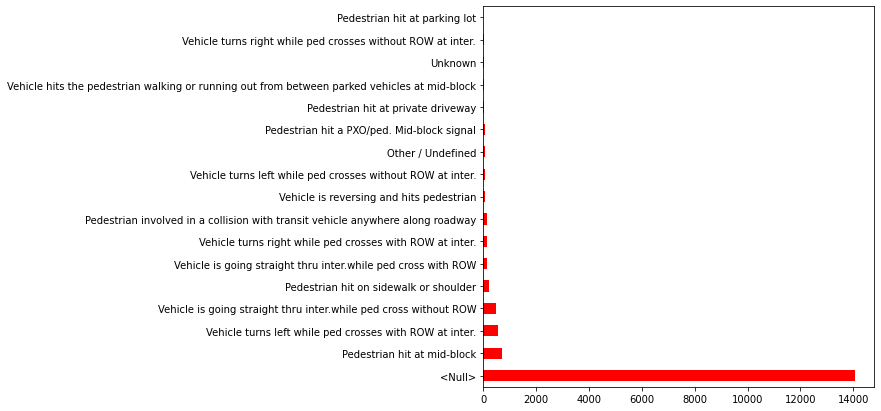

In [104]:
df1['PEDTYPE'].value_counts().sort_values(ascending = False).plot(kind = 'barh', color = 'red', figsize = (7,7))

pedtype and pedestrian 

In [105]:
pedestrian_type= df1.groupby('PEDTYPE')['PEDACT'].count().sort_values(ascending = False).reset_index()
pedestrian_type


,PEDTYPE,PEDACT
0,<Null>,14074
1,Pedestrian hit at mid-block,695
2,Vehicle turns left while ped crosses with ROW ...,550
3,Vehicle is going straight thru inter.while ped...,482
4,Pedestrian hit on sidewalk or shoulder,208
5,Vehicle is going straight thru inter.while ped...,162
6,Vehicle turns right while ped crosses with ROW...,159
7,Pedestrian involved in a collision with transi...,139
8,Vehicle turns left while ped crosses without R...,75
9,Other / Undefined,75


Age involed 

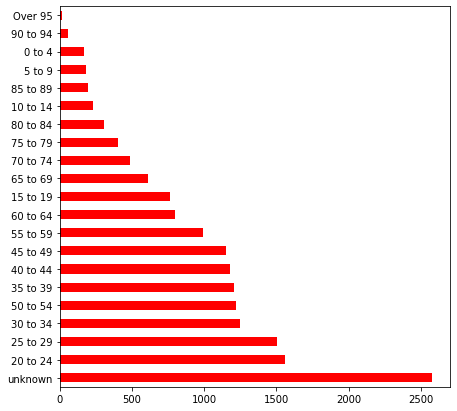

In [106]:
age= df1['INVAGE'].value_counts().sort_values(ascending = False).plot(kind = 'barh', color = 'red', figsize = (7,7))

Impactype and pedestrian

In [107]:
impact= df1.groupby('IMPACTYPE')['PEDACT'].count().sort_values(ascending = False).reset_index()
impact.head(20)

,IMPACTYPE,PEDACT
0,Pedestrian Collisions,6811
1,Turning Movement,2552
2,Cyclist Collisions,1674
3,Rear End,1602
4,SMV Other,1312
5,Angle,1206
6,Approaching,870
7,Sideswipe,466
8,Other,182
9,SMV Unattended Vehicle,181


In [108]:
df2 = df[df['INVTYPE'] == 'Pedestrian']
print (df2)

                  X             Y    INDEX_   ACCNUM  YEAR  \
1     -8.844611e+06  5.412414e+06   3387731   892658  2006   
5     -8.822759e+06  5.424516e+06   3387794   892682  2006   
6     -8.822759e+06  5.424516e+06   3387795   892682  2006   
8     -8.841082e+06  5.411337e+06   3388372   892913  2006   
10    -8.855097e+06  5.418678e+06   3389259   893251  2006   
...             ...           ...       ...      ...   ...   
16817 -8.833869e+06  5.411272e+06  81431952  1521326  2020   
16819 -8.846033e+06  5.420112e+06  81431949  1522941  2020   
16821 -8.846033e+06  5.420112e+06  81431951  1522941  2020   
16839 -8.848388e+06  5.426030e+06  81507560  1566873  2020   
16841 -8.841055e+06  5.417392e+06  81508558  1567749  2020   

                         DATE  TIME  HOUR            STREET1  \
1      2006/03/11 05:00:00+00   852     8         BLOOR ST W   
5      2006/03/12 05:00:00+00   240     2     EGLINTON AVE E   
6      2006/03/12 05:00:00+00   240     2     EGLINTON AVE E   

traffic control and pedestrian 

In [109]:
traffic_control = df1.groupby('TRAFFCTL')['PEDACT'].count().sort_values(ascending = False).reset_index()
traffic_control.head(20)

,TRAFFCTL,PEDACT
0,No Control,8092
1,Traffic Signal,7104
2,Stop Sign,1295
3,Pedestrian Crossover,195
4,Traffic Controller,104
5,<Null>,29
6,Streetcar (Stop for),16
7,Yield Sign,16
8,Traffic Gate,5
9,Police Control,2


Invtype and ped act 

In [110]:
involvement_type=df1.groupby('INVTYPE')['PEDACT'].count().sort_values(ascending = False).reset_index()
involvement_type

,INVTYPE,PEDACT
0,Driver,7618
1,Pedestrian,2871
2,Passenger,2543
3,Vehicle Owner,1636
4,Cyclist,726
5,Motorcycle Driver,607
6,Truck Driver,316
7,Other Property Owner,257
8,Other,174
9,Motorcycle Passenger,32


pedestrian condition 

In [111]:
ped_cond=df1.groupby('PEDCOND')['PEDACT'].count().sort_values(ascending = False).reset_index()
ped_cond

,PEDCOND,PEDACT
0,<Null>,14025
1,Normal,1597
2,Inattentive,496
3,Unknown,355
4,Had Been Drinking,205
5,Medical or Physical Disability,66
6,Other,56
7,"Ability Impaired, Alcohol",38
8,"Ability Impaired, Alcohol Over .80",12
9,"Ability Impaired, Drugs",8


In [112]:
traffic_control.reset_index(drop=True, inplace=True)
impact.reset_index(drop=True, inplace=True)
pedestrian_type.reset_index(drop=True, inplace=True)
involvement_type.reset_index(drop=True, inplace=True)
ped_cond.reset_index(drop=True, inplace=True)

In [113]:
print (pd.concat([traffic_control, impact, pedestrian_type, involvement_type, ped_cond], axis=1))

                TRAFFCTL  PEDACT               IMPACTYPE  PEDACT  \
0             No Control  8092.0   Pedestrian Collisions  6811.0   
1         Traffic Signal  7104.0        Turning Movement  2552.0   
2              Stop Sign  1295.0      Cyclist Collisions  1674.0   
3   Pedestrian Crossover   195.0                Rear End  1602.0   
4     Traffic Controller   104.0               SMV Other  1312.0   
5                 <Null>    29.0                   Angle  1206.0   
6   Streetcar (Stop for)    16.0             Approaching   870.0   
7             Yield Sign    16.0               Sideswipe   466.0   
8           Traffic Gate     5.0                   Other   182.0   
9         Police Control     2.0  SMV Unattended Vehicle   181.0   
10          School Guard     2.0                  <Null>     4.0   
11                   NaN     NaN                     NaN     NaN   
12                   NaN     NaN                     NaN     NaN   
13                   NaN     NaN                

Discriminant Analysis 

In [126]:
df= pd.read_csv('KSI.csv')

In [127]:
KSI_d = df.loc[:,['ACCLASS','PEDTYPE','IMPACTYPE','INVTYPE','TRAFFCTL','PEDESTRIAN','PEDACT','PEDCOND']]

In [128]:
objdtype_cols = KSI_d.select_dtypes(["object"]).columns
KSI_d[objdtype_cols] = KSI_d[objdtype_cols].astype('category')

In [129]:
pedestrian = KSI_d[KSI_d['INVTYPE'].str.contains('Pedestrian')]


In [130]:
lda = LinearDiscriminantAnalysis()

In [131]:
pedestrian = pedestrian[pedestrian.PEDESTRIAN != '<Null>']
pedestrian

,ACCLASS,PEDTYPE,IMPACTYPE,INVTYPE,TRAFFCTL,PEDESTRIAN,PEDACT,PEDCOND
1,Fatal,Vehicle turns left while ped crosses with ROW ...,Pedestrian Collisions,Pedestrian,Traffic Signal,Yes,Crossing with right of way,Unknown
5,Fatal,Pedestrian hit at mid-block,Pedestrian Collisions,Pedestrian,No Control,Yes,"Crossing, no Traffic Control",Normal
6,Fatal,Pedestrian hit at mid-block,Pedestrian Collisions,Pedestrian,No Control,Yes,"Crossing, no Traffic Control",Normal
8,Non-Fatal Injury,Vehicle turns left while ped crosses with ROW ...,Pedestrian Collisions,Pedestrian,Traffic Signal,Yes,Crossing with right of way,Normal
10,Fatal,Vehicle is going straight thru inter.while ped...,Pedestrian Collisions,Pedestrian,Traffic Signal,Yes,Crossing without right of way,Normal
...,...,...,...,...,...,...,...,...
16817,Fatal,Vehicle is going straight thru inter.while ped...,Pedestrian Collisions,Pedestrian,Traffic Signal,Yes,Crossing without right of way,Other
16819,Fatal,Vehicle is going straight thru inter.while ped...,Pedestrian Collisions,Pedestrian,No Control,Yes,"Crossing, no Traffic Control",Unknown
16821,Fatal,Vehicle is going straight thru inter.while ped...,Pedestrian Collisions,Pedestrian,No Control,Yes,"Crossing, no Traffic Control",Inattentive
16839,Non-Fatal Injury,<Null>,Pedestrian Collisions,Pedestrian,Traffic Signal,Yes,<Null>,Normal


In [132]:
pedestrian1=pd.get_dummies(pedestrian['PEDACT'],drop_first=True)
pedestrian1

,Coming From Behind Parked Vehicle,Crossing marked crosswalk without ROW,Crossing with right of way,Crossing without right of way,"Crossing, Pedestrian Crossover","Crossing, no Traffic Control",On Sidewalk or Shoulder,Other,Person Getting on/off School Bus,Person Getting on/off Vehicle,Playing or Working on Highway,Pushing/Working on Vehicle,Running onto Roadway,Walking on Roadway Against Traffic,Walking on Roadway with Traffic
1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
8,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
10,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16817,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
16819,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
16821,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
16839,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [133]:
pedestrian1['ACCLASS']=pedestrian.ACCLASS
pedestrian1

,Coming From Behind Parked Vehicle,Crossing marked crosswalk without ROW,Crossing with right of way,Crossing without right of way,"Crossing, Pedestrian Crossover","Crossing, no Traffic Control",On Sidewalk or Shoulder,Other,Person Getting on/off School Bus,Person Getting on/off Vehicle,Playing or Working on Highway,Pushing/Working on Vehicle,Running onto Roadway,Walking on Roadway Against Traffic,Walking on Roadway with Traffic,ACCLASS
1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,Fatal
5,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,Fatal
6,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,Fatal
8,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,Non-Fatal Injury
10,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,Fatal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16817,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,Fatal
16819,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,Fatal
16821,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,Fatal
16839,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Non-Fatal Injury


In [134]:
lda.fit(pedestrian1.drop(columns=['ACCLASS']), pedestrian1['ACCLASS'])

LinearDiscriminantAnalysis()

In [135]:
pred=pd.DataFrame(lda.predict(pedestrian1.drop(columns='ACCLASS')))

In [136]:
result=pd.concat([pedestrian1,pred],axis=1)
result

,Coming From Behind Parked Vehicle,Crossing marked crosswalk without ROW,Crossing with right of way,Crossing without right of way,"Crossing, Pedestrian Crossover","Crossing, no Traffic Control",On Sidewalk or Shoulder,Other,Person Getting on/off School Bus,Person Getting on/off Vehicle,Playing or Working on Highway,Pushing/Working on Vehicle,Running onto Roadway,Walking on Roadway Against Traffic,Walking on Roadway with Traffic,ACCLASS,0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Fatal,Non-Fatal Injury
5,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Fatal,Non-Fatal Injury
6,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Fatal,Non-Fatal Injury
8,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Non-Fatal Injury,Non-Fatal Injury
10,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Fatal,Non-Fatal Injury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2861,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Non-Fatal Injury
2862,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Non-Fatal Injury
2863,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Non-Fatal Injury
2867,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Non-Fatal Injury


In [140]:
print('Coefficients and intercept')

fct = pd.DataFrame([lda.intercept_],  index=['constant'])
fct = fct.append(pd.DataFrame(lda.coef_.transpose(), index=list(pedestrian1.columns)[:-1]))
print(fct)
print()
classificationSummary(pedestrian1['ACCLASS'],
lda.predict(pedestrian1.drop(columns=['ACCLASS'])),
class_names=lda.classes_)

Coefficients and intercept
                                                  0
constant                               2.855777e+00
Coming From Behind Parked Vehicle     -1.280861e+00
Crossing marked crosswalk without ROW -2.515977e+00
Crossing with right of way            -1.007552e+00
Crossing without right of way         -1.090917e+00
Crossing, Pedestrian Crossover        -1.132190e+00
Crossing, no Traffic Control          -1.897499e+00
On Sidewalk or Shoulder               -1.715240e+00
Other                                 -1.179907e+00
Person Getting on/off School Bus      -4.930064e-15
Person Getting on/off Vehicle         -9.784357e-01
Playing or Working on Highway         -1.174123e+00
Pushing/Working on Vehicle            -1.761184e+00
Running onto Roadway                  -7.181528e-01
Walking on Roadway Against Traffic    -2.113421e+00
Walking on Roadway with Traffic       -1.363497e+00

Confusion Matrix (Accuracy 0.8217)

                 Prediction
          Actual        

C:\Users\Tu Nguyen\AppData\Local\Temp\ipykernel_18952\648668191.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fct = fct.append(pd.DataFrame(lda.coef_.transpose(), index=list(pedestrian1.columns)[:-1]))


<AxesSubplot:ylabel='PEDACT'>

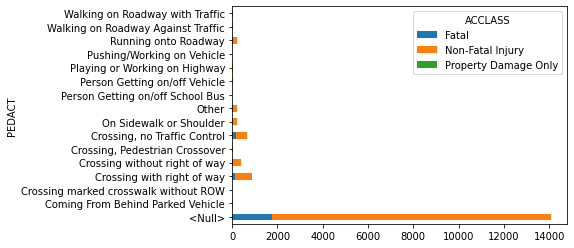

In [146]:
graph = df1.groupby(['ACCLASS', 'PEDACT'])['PEDACT'].count().unstack('ACCLASS').fillna(0)
graph.plot(kind='barh', stacked=True)